## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [12]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [13]:
X.shape

(50,)

In [14]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

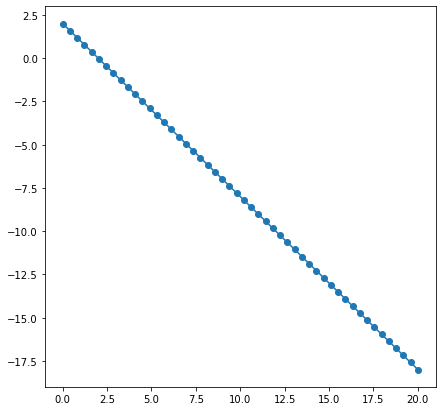

In [15]:
plt.subplots(figsize=(7, 7))
plt.plot(X , y ,  marker = "o")
plt.show()

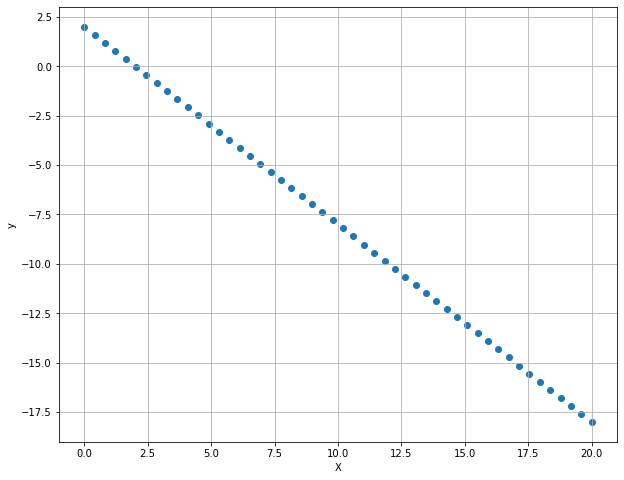

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [104]:
def Batch_GD(x, y, Alpha, epoch):
    theta_0=0
    theta_1=0
    M=len(X)
    loss=[]
    theta0=[]
    theta1=[]
    y_predict=[]

    for i in range(0,epoch):
        print("---------------iteration-----------",i)
        print()
        theta0.append(theta_0)
        theta1.append(theta_1)   
        h_x = theta_0 + theta_1*x
        y_predict.append(h_x)
        print(" h(x) " , h_x )
        print()
        Erorr = h_x - y
        print ("Erorr = " , Erorr)
        j = 1/(2*M) *sum(Erorr **2)
        loss.append(j)
        print("loss: " , j)
        d_theta_0 = (1/M) * sum(Erorr)
        d_theta_1 = (1/M) * sum((Erorr)*x)
        gredent_vector = np.array([[d_theta_0] , [d_theta_1]])
        print("Gredent_vector : \n" , gredent_vector)
        norm_g = np.linalg.norm(gredent_vector )
        print("norm_g", norm_g)
        print()
        
       
        if i>0 and abs(loss[-1] - loss[-2]) < 0.001:
            break
    
        if norm_g < 0.001:
            break
            
        theta_0 = theta_0 - (Alpha * d_theta_0)
        print("theta_0_new:", theta_0)
        print()
        theta_1 = theta_1 - (Alpha * d_theta_1)
        print("theta_1_new:", theta_1)   
          
           
    print("--------------------training report--------------------") 
    
    print("theta_0_opt:", theta_0)
    
    print("theta_1_opt:", theta_1)
   
    print("Error Vector:\n", Erorr)
   
    print("\n cost", j)

    print("\n y_actual \n", y)

    return loss, theta0, theta1 , i , y_predict
    
    

In [119]:
cost , Th_0 , Th_1 , epoch ,y_pred = Batch_GD(X, y, 0.005, 300)

---------------iteration----------- 0

 h(x)  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Erorr =  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
loss:  49.34693877551021
Gredent_vector : 
 [[  8.        ]
 [114.69387755]]
norm_g 114.97254258164628

theta_0_new: -0.04

theta_1_new: -0.5734693877551021
---------------iteration

theta_0_new: 0.05014520101557667

theta_1_new: -0.8549622196216098
---------------iteration----------- 44

 h(x)  [  0.0501452   -0.29881897  -0.64778314  -0.99674731  -1.34571148
  -1.69467566  -2.04363983  -2.392604    -2.74156817  -3.09053234
  -3.43949651  -3.78846068  -4.13742485  -4.48638903  -4.8353532
  -5.18431737  -5.53328154  -5.88224571  -6.23120988  -6.58017405
  -6.92913822  -7.2781024   -7.62706657  -7.97603074  -8.32499491
  -8.67395908  -9.02292325  -9.37188742  -9.72085159 -10.06981577
 -10.41877994 -10.76774411 -11.11670828 -11.46567245 -11.81463662
 -12.16360079 -12.51256496 -12.86152914 -13.21049331 -13.55945748
 -13.90842165 -14.25738582 -14.60634999 -14.95531416 -15.30427834
 -15.65324251 -16.00220668 -16.35117085 -16.70013502 -17.04909919]

Erorr =  [-1.9498548  -1.8906557  -1.83145661 -1.77225752 -1.71305842 -1.65385933
 -1.59466023 -1.53546114 -1.47626205 -1.41706295 -1.35786386 -1.29866476
 -1.23946567 -1.18026658 -1.12106748 -1.06186839 -1.00266929 -0.943470

 -15.69498771 -16.04741255 -16.39983739 -16.75226222 -17.10468706]

Erorr =  [-1.83586996 -1.78013153 -1.7243931  -1.66865468 -1.61291625 -1.55717782
 -1.5014394  -1.44570097 -1.38996255 -1.33422412 -1.27848569 -1.22274727
 -1.16700884 -1.11127041 -1.05553199 -0.99979356 -0.94405513 -0.88831671
 -0.83257828 -0.77683986 -0.72110143 -0.665363   -0.60962458 -0.55388615
 -0.49814772 -0.4424093  -0.38667087 -0.33093244 -0.27519402 -0.21945559
 -0.16371716 -0.10797874 -0.05224031  0.00349811  0.05923654  0.11497497
  0.17071339  0.22645182  0.28219025  0.33792867  0.3936671   0.44940553
  0.50514395  0.56088238  0.6166208   0.67235923  0.72809766  0.78383608
  0.83957451  0.89531294]
loss:  0.43407359140495744
Gredent_vector : 
 [[-0.47027851]
 [ 0.03498114]]
norm_g 0.47157773205429576

theta_0_new: 0.16648143588970812

theta_1_new: -0.8636157610507005
---------------iteration----------- 92

 h(x)  [  0.16648144  -0.18601479  -0.53851102  -0.89100725  -1.24350348
  -1.59599971  -1.94849594  

 [ 0.03340383]]
norm_g 0.45031412462114595

theta_0_new: 0.24915543917395436

theta_1_new: -0.8697653748258329
---------------iteration----------- 128

 h(x)  [  0.24915544  -0.10585084  -0.46085711  -0.81586339  -1.17086966
  -1.52587594  -1.88088221  -2.23588849  -2.59089476  -2.94590104
  -3.30090732  -3.65591359  -4.01091987  -4.36592614  -4.72093242
  -5.07593869  -5.43094497  -5.78595124  -6.14095752  -6.49596379
  -6.85097007  -7.20597635  -7.56098262  -7.9159889   -8.27099517
  -8.62600145  -8.98100772  -9.336014    -9.69102027 -10.04602655
 -10.40103282 -10.7560391  -11.11104537 -11.46605165 -11.82105793
 -12.1760642  -12.53107048 -12.88607675 -13.24108303 -13.5960893
 -13.95109558 -14.30610185 -14.66110813 -15.0161144  -15.37112068
 -15.72612696 -16.08113323 -16.43613951 -16.79114578 -17.14615206]

Erorr =  [-1.75084456 -1.69768757 -1.64453058 -1.59137359 -1.5382166  -1.48505961
 -1.43190262 -1.37874563 -1.32558864 -1.27243165 -1.21927466 -1.16611767
 -1.11296068 -1.05980369 

In [83]:
y_predict = Th_0[-1] + Th_1[-1]*X
y_predict

array([  0.26256738,  -0.09284609,  -0.44825957,  -0.80367304,
        -1.15908651,  -1.51449998,  -1.86991345,  -2.22532693,
        -2.5807404 ,  -2.93615387,  -3.29156734,  -3.64698082,
        -4.00239429,  -4.35780776,  -4.71322123,  -5.0686347 ,
        -5.42404818,  -5.77946165,  -6.13487512,  -6.49028859,
        -6.84570207,  -7.20111554,  -7.55652901,  -7.91194248,
        -8.26735596,  -8.62276943,  -8.9781829 ,  -9.33359637,
        -9.68900984, -10.04442332, -10.39983679, -10.75525026,
       -11.11066373, -11.46607721, -11.82149068, -12.17690415,
       -12.53231762, -12.88773109, -13.24314457, -13.59855804,
       -13.95397151, -14.30938498, -14.66479846, -15.02021193,
       -15.3756254 , -15.73103887, -16.08645235, -16.44186582,
       -16.79727929, -17.15269276])

In [84]:
from sklearn.metrics import r2_score
r2_score(y,y_predict)

0.9775884119071931

Text(0, 0.5, 'loss')

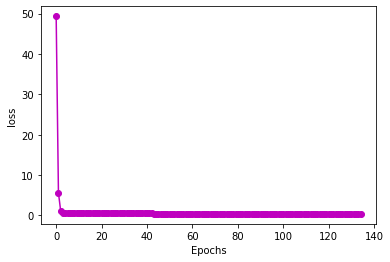

In [88]:
plt.plot(np.arange(epoch+1), cost , "-mo")
plt.xlabel("Epochs")
plt.ylabel("loss")

Text(0.5, 1.0, 'learning rat = 0.005')

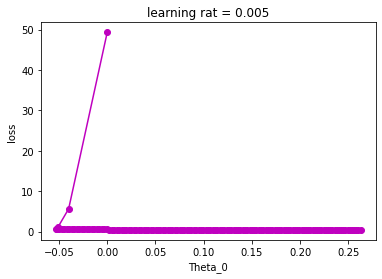

In [86]:
plt.plot(Th_0 , cost , "-mo")
plt.xlabel("Theta_0")
plt.ylabel("loss")
plt.title("learning rat = 0.005")

Text(0.5, 1.0, 'learning rat = 0.005')

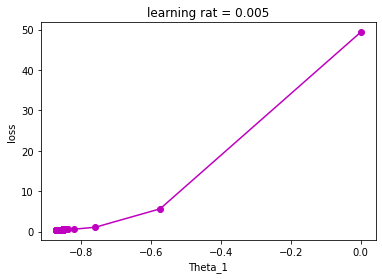

In [89]:
plt.plot(Th_1 , cost , "-mo")
plt.xlabel("Theta_1")
plt.ylabel("loss")
plt.title("learning rat = 0.005")

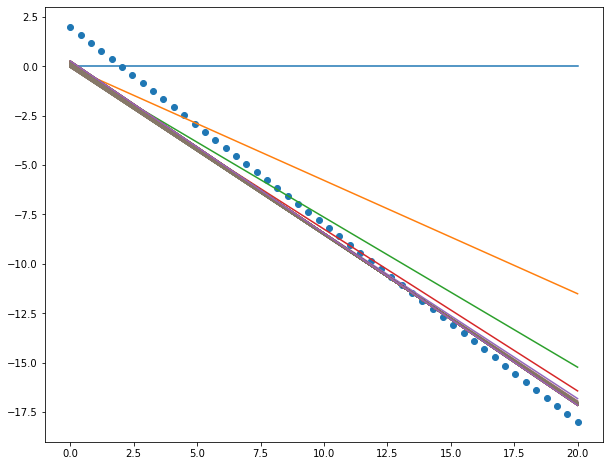

In [120]:
plt.figure(figsize=(10,8))
plt.scatter( X,y, marker="o" )
for i in y_pred:
    plt.plot( X,i)
plt.show()

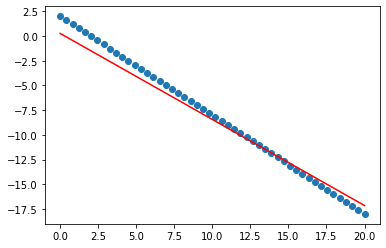

In [121]:
plt.scatter( X,y, marker="o" )
plt.plot( X,y_pred[-1], color="red")
plt.show()

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [115]:
cost , Th_0 , Th_1 , epoch , Y_pred  = Batch_GD(X, y, 0.0005, 300)

---------------iteration----------- 0

 h(x)  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Erorr =  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
loss:  49.34693877551021
Gredent_vector : 
 [[  8.        ]
 [114.69387755]]
norm_g 114.97254258164628

theta_0_new: -0.004

theta_1_new: -0.05734693877551021
---------------iterati

 -13.42289399 -13.72014177 -14.01738954 -14.31463731 -14.61188509]

Erorr =  [-2.04674417 -1.93582868 -1.82491319 -1.71399769 -1.6030822  -1.49216671
 -1.38125122 -1.27033573 -1.15942024 -1.04850475 -0.93758925 -0.82667376
 -0.71575827 -0.60484278 -0.49392729 -0.3830118  -0.27209631 -0.16118081
 -0.05026532  0.06065017  0.17156566  0.28248115  0.39339664  0.50431214
  0.61522763  0.72614312  0.83705861  0.9479741   1.05888959  1.16980508
  1.28072058  1.39163607  1.50255156  1.61346705  1.72438254  1.83529803
  1.94621352  2.05712902  2.16804451  2.27896     2.38987549  2.50079098
  2.61170647  2.72262196  2.83353746  2.94445295  3.05536844  3.16628393
  3.27719942  3.38811491]
loss:  1.5058808242317694
Gredent_vector : 
 [[ 0.67068537]
 [16.1346705 ]]
norm_g 16.14860399093068

theta_0_new: -0.04707951079642622

theta_1_new: -0.736324381211695
---------------iteration----------- 29

 h(x)  [ -0.04707951  -0.34762007  -0.64816064  -0.9487012   -1.24924177
  -1.54978233  -1.85032289  -2.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [91]:
y_predict = Th_0[-1] + Th_1[-1]*X
y_predict

array([ -0.04520484,  -0.38763135,  -0.73005787,  -1.07248438,
        -1.41491089,  -1.7573374 ,  -2.09976391,  -2.44219042,
        -2.78461693,  -3.12704345,  -3.46946996,  -3.81189647,
        -4.15432298,  -4.49674949,  -4.839176  ,  -5.18160252,
        -5.52402903,  -5.86645554,  -6.20888205,  -6.55130856,
        -6.89373507,  -7.23616158,  -7.5785881 ,  -7.92101461,
        -8.26344112,  -8.60586763,  -8.94829414,  -9.29072065,
        -9.63314717,  -9.97557368, -10.31800019, -10.6604267 ,
       -11.00285321, -11.34527972, -11.68770624, -12.03013275,
       -12.37255926, -12.71498577, -13.05741228, -13.39983879,
       -13.7422653 , -14.08469182, -14.42711833, -14.76954484,
       -15.11197135, -15.45439786, -15.79682437, -16.13925089,
       -16.4816774 , -16.82410391])

In [92]:
from sklearn.metrics import r2_score
r2_score(y,y_predict)

0.9686158031920962

r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

Text(0, 0.5, 'loss')

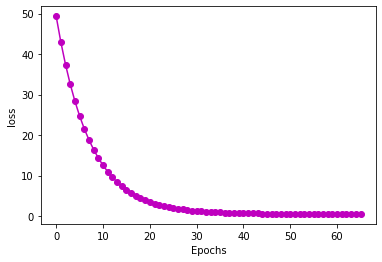

In [93]:
plt.plot(np.arange(epoch+1), cost , "-mo")
plt.xlabel("Epochs")
plt.ylabel("loss")

Text(0.5, 1.0, 'learning rat = 0.005')

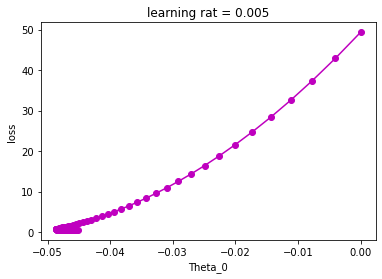

In [94]:
plt.plot(Th_0 , cost , "-mo")
plt.xlabel("Theta_0")
plt.ylabel("loss")
plt.title("learning rat = 0.005")

Text(0.5, 1.0, 'learning rat = 0.005')

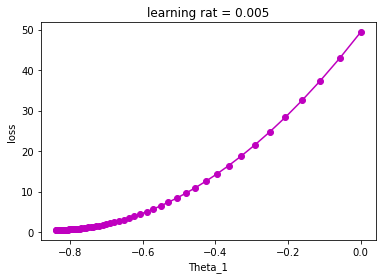

In [95]:
plt.plot(Th_1 , cost , "-mo")
plt.xlabel("Theta_1")
plt.ylabel("loss")
plt.title("learning rat = 0.005")

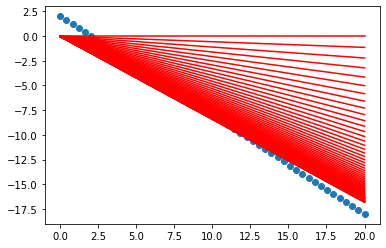

In [117]:
plt.scatter( X,y, marker="o" )
for i in Y_pred:
    plt.plot( X,i ,color="red")
plt.show()

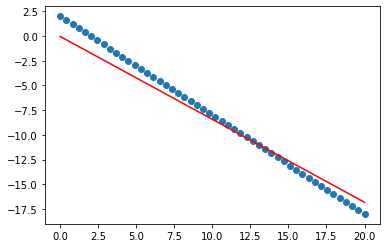

In [118]:
plt.scatter( X,y, marker="o" )
plt.plot( X,Y_pred[-1], color="red")
plt.show()

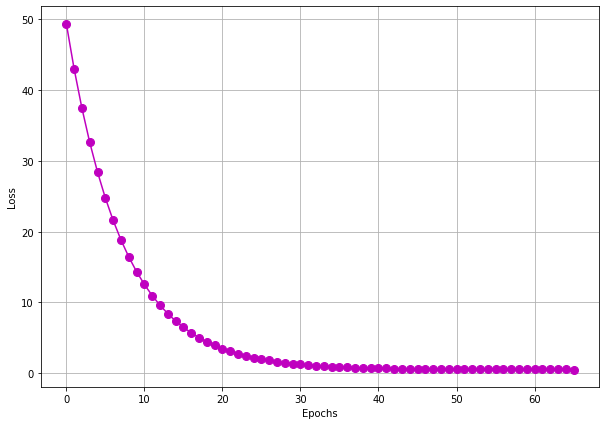

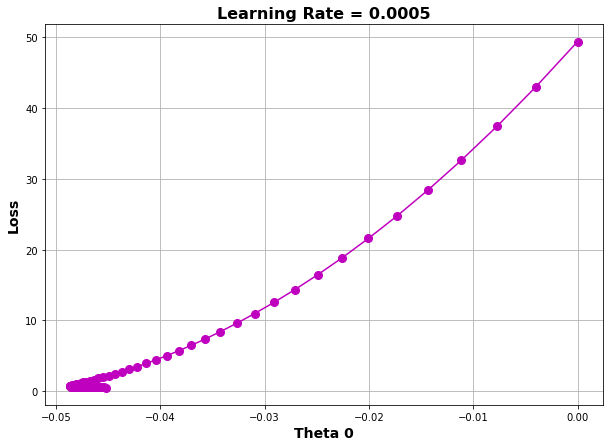

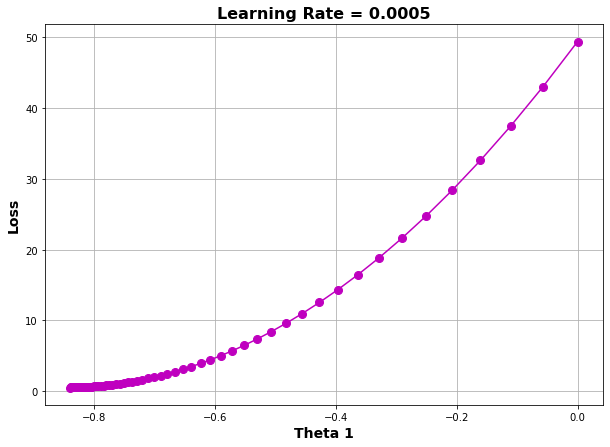

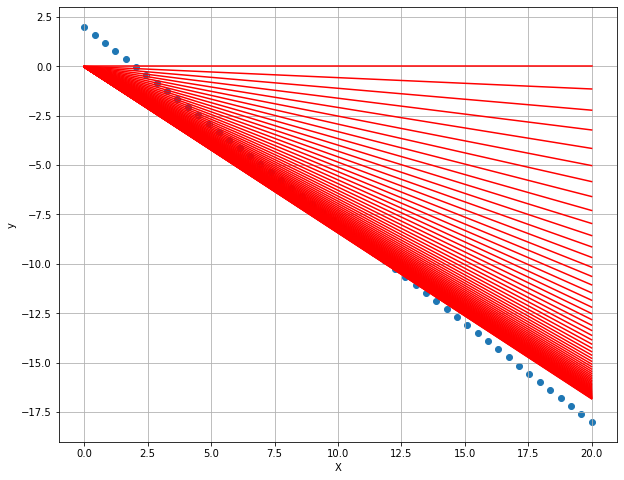

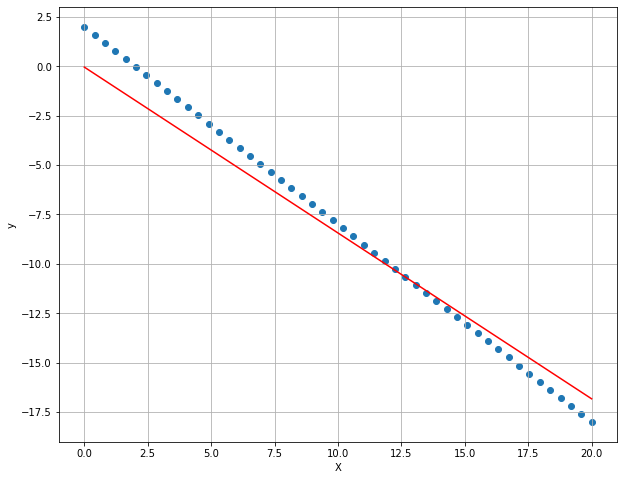

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [130]:
def Momentum_GD (x, y , gama , Alpha, epoch):
    theta_0=0
    theta_1=0
    M=len(X)
    loss=[]
    theta0=[]
    theta1=[]
    y_predict=[]
    v_0 =0
    v_1=0

    for i in range(0,epoch):
        print("---------------iteration-----------",i)
        print()
        theta0.append(theta_0)
        theta1.append(theta_1)   
        h_x = theta_0 + theta_1*x
        y_predict.append(h_x)
        print(" h(x) " , h_x )
        print()
        Erorr = h_x - y
        print ("Erorr = " , Erorr)
        j = 1/(2*M) *sum(Erorr **2)
        loss.append(j)
        print("loss: " , j)
        d_theta_0 = (1/M) * sum(Erorr)
        d_theta_1 = (1/M) * sum((Erorr)*x)
        gredent_vector = np.array([[d_theta_0] , [d_theta_1]])
        print("Gredent_vector : \n" , gredent_vector)
        norm_g = np.linalg.norm(gredent_vector )
        print("norm_g", norm_g)
        print()
        
       
        if i>0 and abs(loss[-1] - loss[-2]) < 0.001:
            break
    
        if norm_g < 0.001:
            break
        v_0= (gama*v_0) +  (Alpha * d_theta_0)
        
        theta_0 = theta_0 - v_0
        
        print("theta_0_new:", theta_0)
        
        v_1= (gama*v_1) +  (Alpha * d_theta_1)
      
        theta_1 = theta_1 - v_1
        print("theta_1_new:", theta_1)   
          
           
    print("--------------------training report--------------------") 
    
    print("theta_0_opt:", theta_0)
    
    print("theta_1_opt:", theta_1)
   
    print("Error Vector:\n", Erorr)
   
    print("\n cost", j)

    print("\n y_actual \n", y)

    return loss, theta0, theta1 , i , y_predict
    
    

In [131]:
cost , Th_0 , Th_1 , epoch, y_predt = Momentum_GD (X, y, 0.5 , 0.0005, 300)

---------------iteration----------- 0

 h(x)  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Erorr =  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
loss:  49.34693877551021
Gredent_vector : 
 [[  8.        ]
 [114.69387755]]
norm_g 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0.05734693877551021
---------------iteratio

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [132]:
r2_score(y,y_predt[-1])

0.9687892837396442

r2_score: 0.9687892837396442


Text(0, 0.5, 'loss')

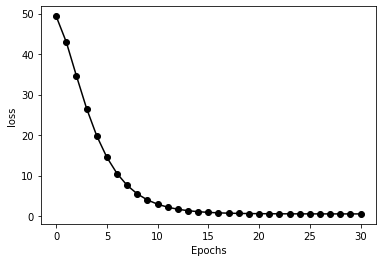

In [135]:
plt.plot(np.arange(epoch+1), cost , "-mo" ,color="black")
plt.xlabel("Epochs")
plt.ylabel("loss")

Text(0.5, 1.0, 'learning rat = 0.0005 & gama=0.5')

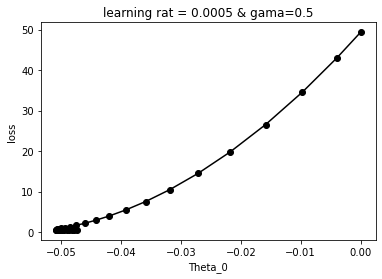

In [138]:
plt.plot(Th_0 , cost , "-mo" , color="black")
plt.xlabel("Theta_0")
plt.ylabel("loss")
plt.title("learning rat = 0.0005 & gama=0.5")

Text(0.5, 1.0, 'learning rat = 0.0005 & gama=0.5')

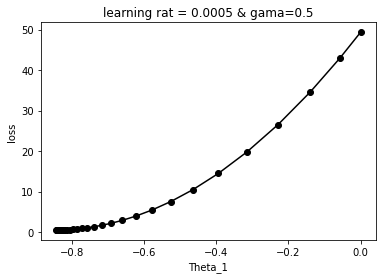

In [139]:
plt.plot(Th_1 , cost , "-mo" , color="black")
plt.xlabel("Theta_1")
plt.ylabel("loss")
plt.title("learning rat = 0.0005 & gama=0.5")

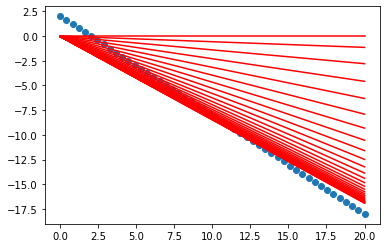

In [140]:
plt.scatter( X,y, marker="o" )
for i in y_predt:
    plt.plot( X,i ,color="red")
plt.show()

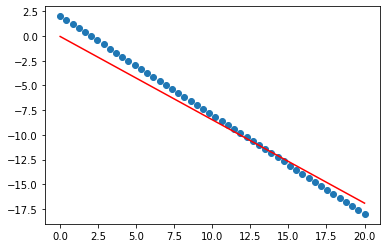

In [141]:
plt.scatter( X,y, marker="o" )
plt.plot( X,y_predt[-1], color="red")
plt.show()

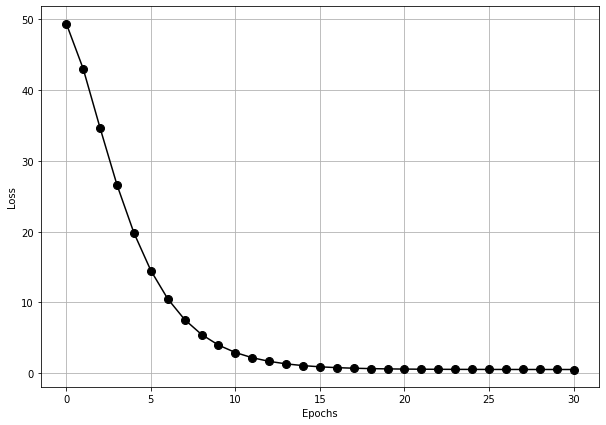

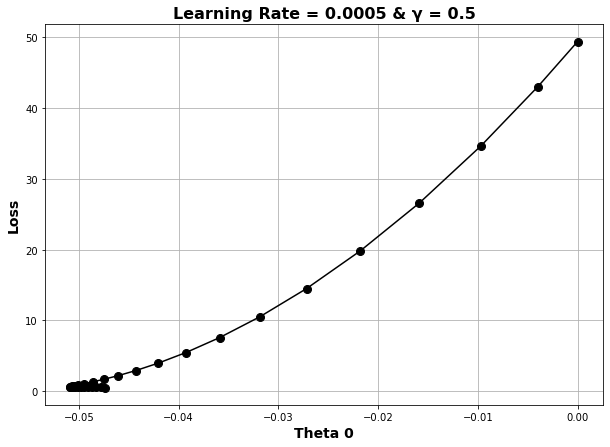

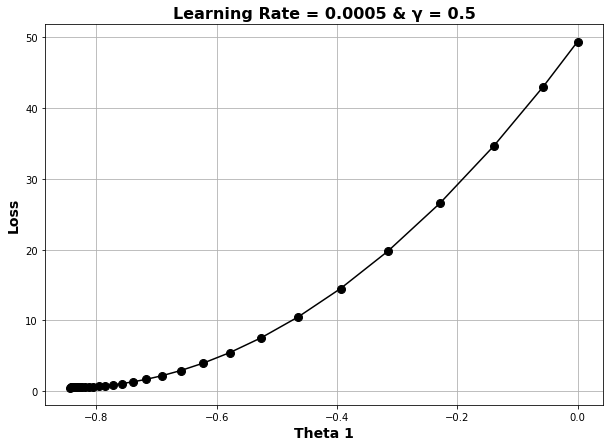

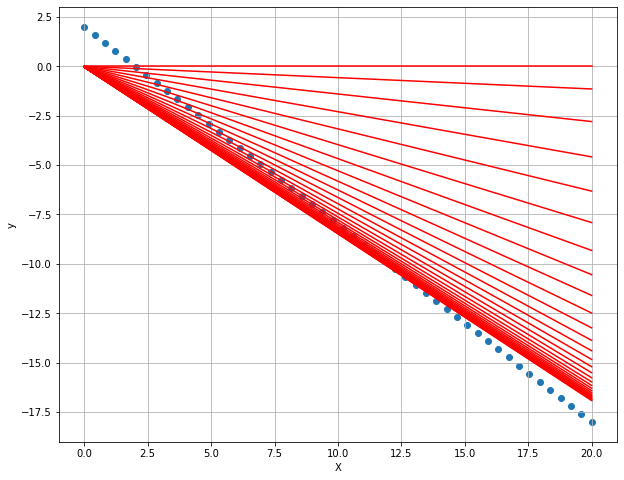

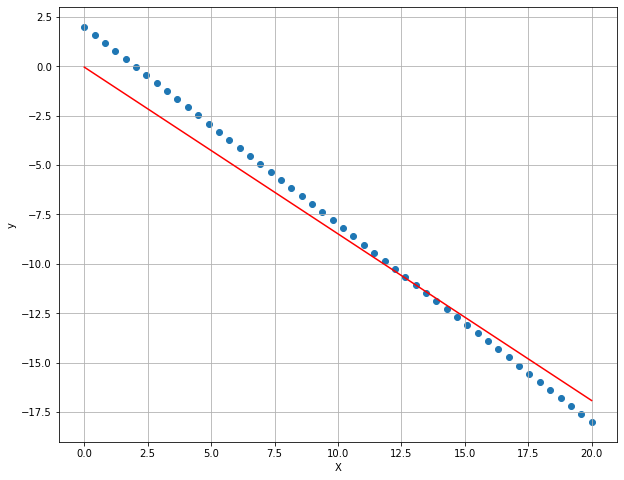

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [142]:
cost , Th_0 , Th_1 , epoch, y_predt = Momentum_GD (X, y, 0.9 , 0.0005, 300)

---------------iteration----------- 0

 h(x)  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Erorr =  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
loss:  49.34693877551021
Gredent_vector : 
 [[  8.        ]
 [114.69387755]]
norm_g 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0.05734693877551021
---------------iteratio

 -15.26724273 -15.60712273 -15.94700273 -16.28688274 -16.62676274]

Erorr =  [-1.97264265 -1.90435939 -1.83607613 -1.76779286 -1.6995096  -1.63122633
 -1.56294307 -1.49465981 -1.42637654 -1.35809328 -1.28981002 -1.22152675
 -1.15324349 -1.08496023 -1.01667696 -0.9483937  -0.88011044 -0.81182717
 -0.74354391 -0.67526064 -0.60697738 -0.53869412 -0.47041085 -0.40212759
 -0.33384433 -0.26556106 -0.1972778  -0.12899454 -0.06071127  0.00757199
  0.07585525  0.14413852  0.21242178  0.28070505  0.34898831  0.41727157
  0.48555484  0.5538381   0.62212136  0.69040463  0.75868789  0.82697115
  0.89525442  0.96353768  1.03182094  1.10010421  1.16838747  1.23667074
  1.304954    1.37323726]
loss:  0.5304045027961591
Gredent_vector : 
 [[-0.29970269]
 [ 2.80705046]]
norm_g 2.8230044217150563

theta_0_new: 0.031330334649392076
theta_1_new: -0.8135078431959585
---------------iteration----------- 44

 h(x)  [  0.03133033  -0.30071368  -0.6327577   -0.96480172  -1.29684574
  -1.62888975  -1.96093377  -2

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [144]:
r2_score(y,y_predt[-1])

0.973589591111118

r2_score 0.973589591111118


Text(0, 0.5, 'loss')

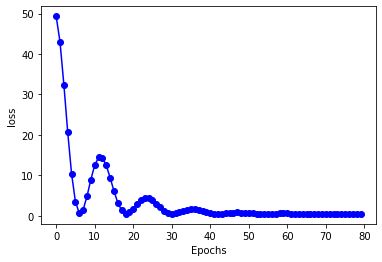

In [145]:
plt.plot(np.arange(epoch+1), cost , "-mo" ,color="blue")
plt.xlabel("Epochs")
plt.ylabel("loss")

Text(0.5, 1.0, 'learning rat = 0.0005 & gama=0.9')

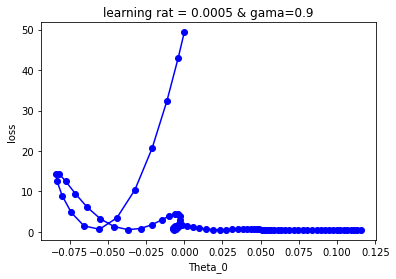

In [147]:
plt.plot(Th_0 , cost , "-mo" , color="blue")
plt.xlabel("Theta_0")
plt.ylabel("loss")
plt.title("learning rat = 0.0005 & gama=0.9")

Text(0.5, 1.0, 'learning rat = 0.0005 & gama=0.9')

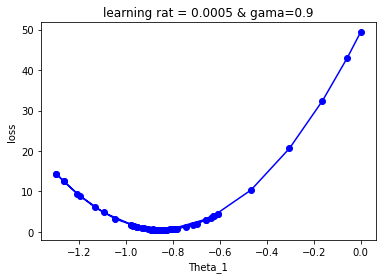

In [148]:
plt.plot(Th_1 , cost , "-mo" , color="blue")
plt.xlabel("Theta_1")
plt.ylabel("loss")
plt.title("learning rat = 0.0005 & gama=0.9")

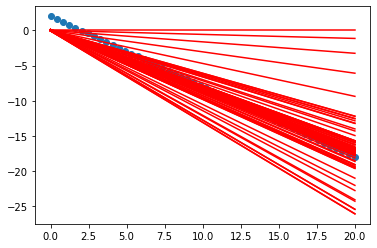

In [149]:
plt.scatter( X,y, marker="o" )
for i in y_predt:
    plt.plot( X,i ,color="red")
plt.show()

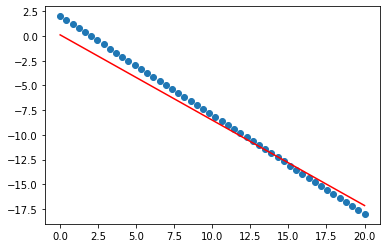

In [150]:
plt.scatter( X,y, marker="o" )
plt.plot( X,y_predt[-1] ,color="red")
plt.show()

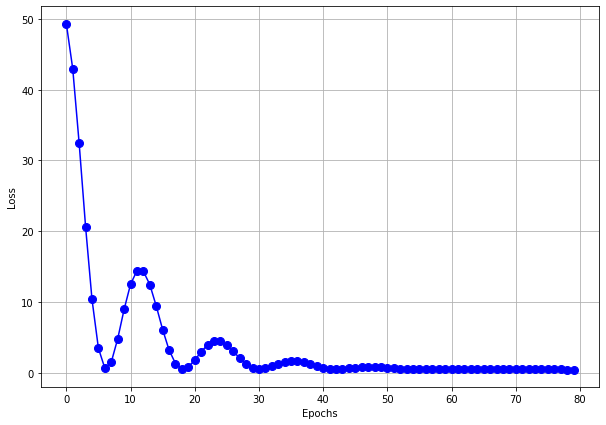

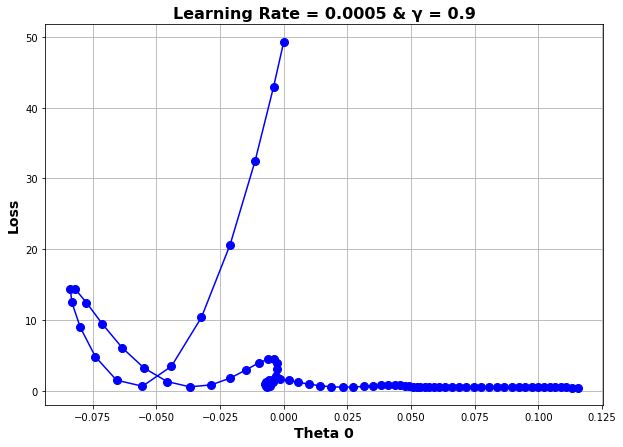

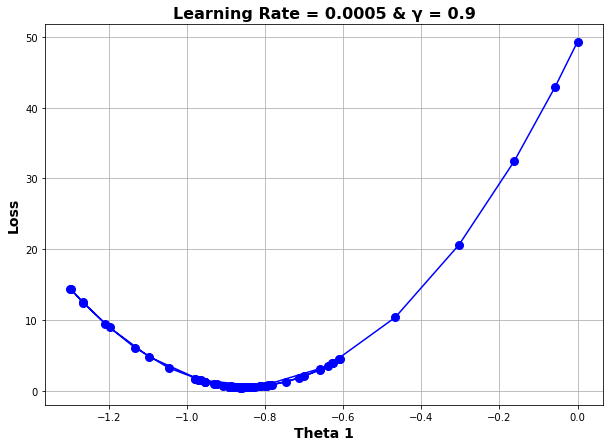

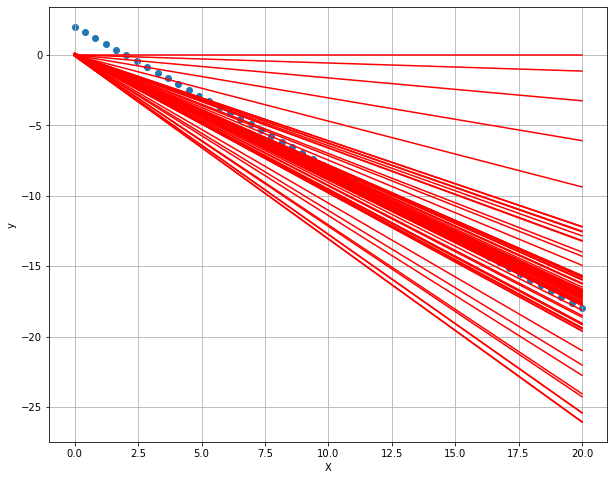

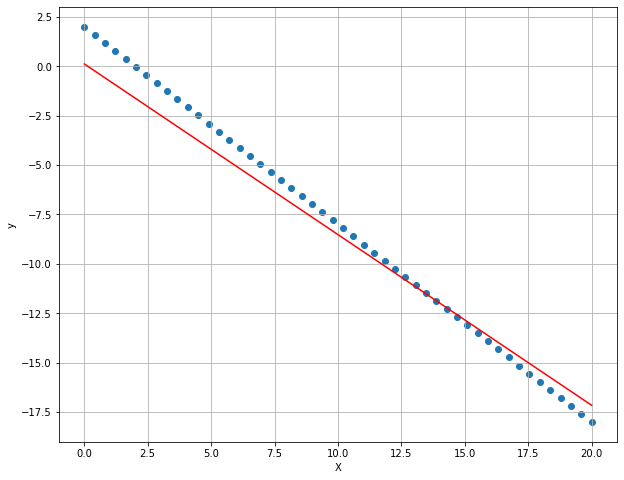

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [151]:
cost , Th_0 , Th_1 , epoch, y_predt = Momentum_GD (X, y, 0.89 , 0.0005, 300)

---------------iteration----------- 0

 h(x)  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Erorr =  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
loss:  49.34693877551021
Gredent_vector : 
 [[  8.        ]
 [114.69387755]]
norm_g 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0.05734693877551021
---------------iteratio

 -0.99457287 -0.97345598]
loss:  1.1577037143809235
Gredent_vector : 
 [[ -1.49081988]
 [-13.11326282]]
norm_g 13.197734870086313

theta_0_new: -0.006426202898457151
theta_1_new: -0.95585487785777
---------------iteration----------- 35

 h(x)  [-6.42620290e-03 -3.96571051e-01 -7.86715899e-01 -1.17686075e+00
 -1.56700560e+00 -1.95715044e+00 -2.34729529e+00 -2.73744014e+00
 -3.12758499e+00 -3.51772984e+00 -3.90787468e+00 -4.29801953e+00
 -4.68816438e+00 -5.07830923e+00 -5.46845408e+00 -5.85859892e+00
 -6.24874377e+00 -6.63888862e+00 -7.02903347e+00 -7.41917832e+00
 -7.80932317e+00 -8.19946801e+00 -8.58961286e+00 -8.97975771e+00
 -9.36990256e+00 -9.76004741e+00 -1.01501923e+01 -1.05403371e+01
 -1.09304819e+01 -1.13206268e+01 -1.17107716e+01 -1.21009165e+01
 -1.24910613e+01 -1.28812062e+01 -1.32713510e+01 -1.36614959e+01
 -1.40516407e+01 -1.44417856e+01 -1.48319304e+01 -1.52220753e+01
 -1.56122201e+01 -1.60023650e+01 -1.63925098e+01 -1.67826547e+01
 -1.71727995e+01 -1.75629444e+01 -1.79530

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [152]:
r2_score(y,y_predt[-1])

0.972435565060376

Text(0, 0.5, 'loss')

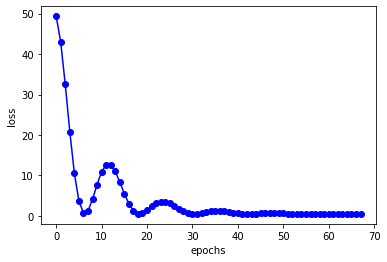

In [155]:
plt.plot( cost , "-mo" , color="blue")
plt.xlabel("epochs")
plt.ylabel("loss")

Text(0.5, 1.0, 'learning rat = 0.0005 & gama=0.89')

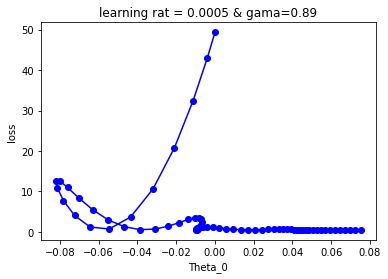

In [153]:
plt.plot(Th_0 , cost , "-mo" , color="blue")
plt.xlabel("Theta_0")
plt.ylabel("loss")
plt.title("learning rat = 0.0005 & gama=0.89")

Text(0.5, 1.0, 'learning rat = 0.0005 & gama=0.9')

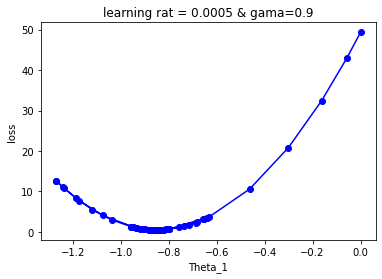

In [154]:
plt.plot(Th_1 , cost , "-mo" , color="blue")
plt.xlabel("Theta_1")
plt.ylabel("loss")
plt.title("learning rat = 0.0005 & gama=0.9")

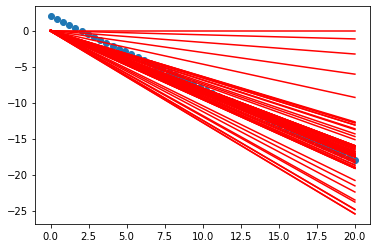

In [156]:
plt.scatter( X,y, marker="o" )
for i in y_predt:
    plt.plot( X,i ,color="red")
plt.show()

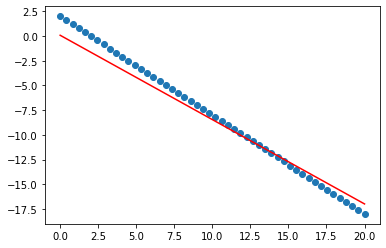

In [157]:
plt.scatter( X,y, marker="o" )
plt.plot( X,y_predt[-1] ,color="red")
plt.show()

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [172]:
def NAG_GD (x, y , gama , Alpha, epoch):
    theta_0=0
    theta_1=0
    M=len(X)
    loss=[]
    theta0=[]
    theta1=[]
    y_predict=[]
    v_0 =0
    v_1=0

    for i in range(0,epoch):
        print("---------------iteration-----------",i)
        print()
        theta0.append(theta_0)
        theta1.append(theta_1)   
        h_x = theta_0 + theta_1*x
        y_predict.append(h_x)
        print(" h(x) " , h_x )
        print()
        Erorr = h_x - y
        print ("Erorr = " , Erorr)
        j = 1/(2*M) *sum(Erorr **2)
        loss.append(j)
        print("loss: " , j)
        d_theta_0 = (1/M) * sum(Erorr)
        d_theta_1 = (1/M) * sum((Erorr)*x)
        gredent_vector = np.array([[d_theta_0] , [d_theta_1]])
        print("Gredent_vector : \n" , gredent_vector)
        norm_g = np.linalg.norm(gredent_vector )
        print("norm_g", norm_g)
        print()
        
       
        if i>0 and abs(loss[-1] - loss[-2]) < 0.001:
            break
    
        if norm_g < 0.001:
            break
            
        W_temp_0 = theta_0 - (gama*v_0)
        W_temp_1 = theta_1 - (gama*v_1)
        h_x_t = W_temp_0 + W_temp_1*x
        Erorr_t = h_x_t - y 
        d_W_temp_0 = (1/M)* sum (Erorr_t)
        d_W_temp_1 = (1/M) *sum((Erorr_t)*X)
        
        theta_0 = W_temp_0 -  (Alpha * d_W_temp_0)
        theta_1 = W_temp_1 -  (Alpha * d_W_temp_1)
        
        v_0 = (gama*v_0) + (Alpha * d_W_temp_0)
        v_1 = (gama*v_1) + (Alpha * d_W_temp_1) 
        print("theta_0_new:", theta_0)      
        print("theta_1_new:", theta_1)   
          
           
    print("--------------------training report--------------------") 
    
    print("theta_0_opt:", theta_0)
    
    print("theta_1_opt:", theta_1)
   
    print("Error Vector:\n", Erorr)
   
    print("\n cost", j)

    print("\n y_actual \n", y)

    return loss, theta0, theta1 , i , y_predict
    
    

In [178]:
cost, Th_0, Th_1 , i , y_predc = NAG_GD (X, y , 0.9 , 0.0005, 300)

---------------iteration----------- 0

 h(x)  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Erorr =  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
loss:  49.34693877551021
Gredent_vector : 
 [[  8.        ]
 [114.69387755]]
norm_g 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0.05734693877551021
---------------iteratio

  0.31380135  0.36177898]
loss:  0.5707123727769348
Gredent_vector : 
 [[-0.81367303]
 [-4.05863149]]
norm_g 4.13939045689593

theta_0_new: 0.013756350026451668
theta_1_new: -0.8778640053720581
---------------iteration----------- 39

 h(x)  [ 1.37563500e-02 -3.44555489e-01 -7.02867328e-01 -1.06117917e+00
 -1.41949101e+00 -1.77780284e+00 -2.13611468e+00 -2.49442652e+00
 -2.85273836e+00 -3.21105020e+00 -3.56936204e+00 -3.92767388e+00
 -4.28598572e+00 -4.64429756e+00 -5.00260939e+00 -5.36092123e+00
 -5.71923307e+00 -6.07754491e+00 -6.43585675e+00 -6.79416859e+00
 -7.15248043e+00 -7.51079227e+00 -7.86910411e+00 -8.22741595e+00
 -8.58572778e+00 -8.94403962e+00 -9.30235146e+00 -9.66066330e+00
 -1.00189751e+01 -1.03772870e+01 -1.07355988e+01 -1.10939107e+01
 -1.14522225e+01 -1.18105343e+01 -1.21688462e+01 -1.25271580e+01
 -1.28854699e+01 -1.32437817e+01 -1.36020935e+01 -1.39604054e+01
 -1.43187172e+01 -1.46770290e+01 -1.50353409e+01 -1.53936527e+01
 -1.57519646e+01 -1.61102764e+01 -1.64685882

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [175]:
r2_score(y , y_predc[-1])

0.971103130756324

r2_score 0.971103130756324


Text(0, 0.5, 'loss')

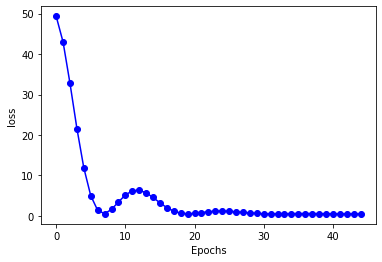

In [180]:
plt.plot(cost , "-mo" , color = "blue")
plt.xlabel("Epochs")
plt.ylabel("loss")

Text(0.5, 1.0, 'learning rat = 0.0005 & gama=0.9')

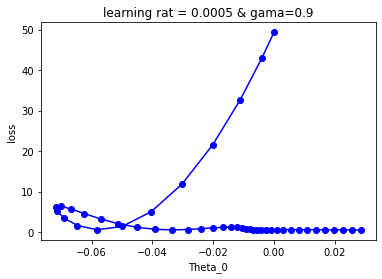

In [181]:
plt.plot(Th_0 , cost , "-mo" , color="blue")
plt.xlabel("Theta_0")
plt.ylabel("loss")
plt.title("learning rat = 0.0005 & gama=0.9")

Text(0.5, 1.0, 'learning rat = 0.0005 & gama=0.9')

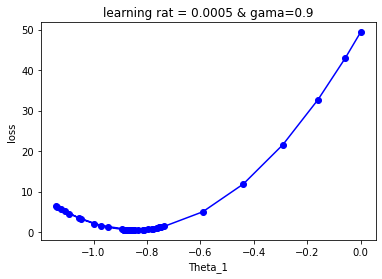

In [182]:
plt.plot(Th_1 , cost , "-mo" , color="blue")
plt.xlabel("Theta_1")
plt.ylabel("loss")
plt.title("learning rat = 0.0005 & gama=0.9")

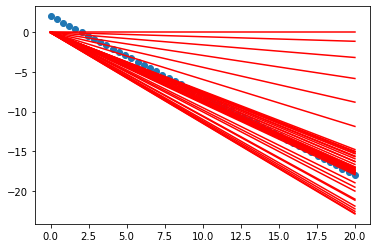

In [183]:
plt.scatter( X,y, marker="o" )
for i in y_predc:
    plt.plot( X,i ,color="red")
plt.show()

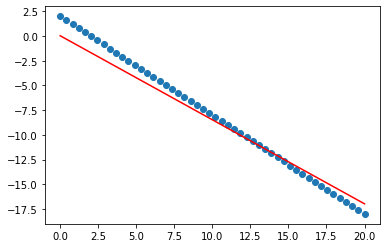

In [184]:
plt.scatter( X,y, marker="o" )
plt.plot( X,y_predc[-1] ,color="red")
plt.show()

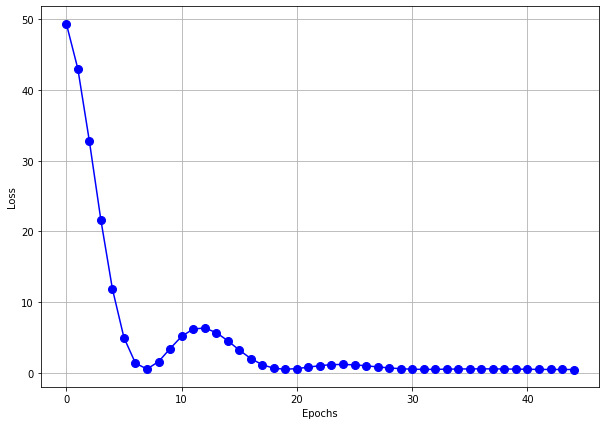

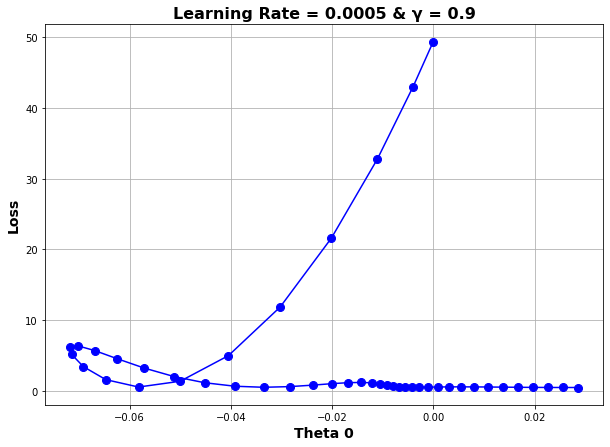

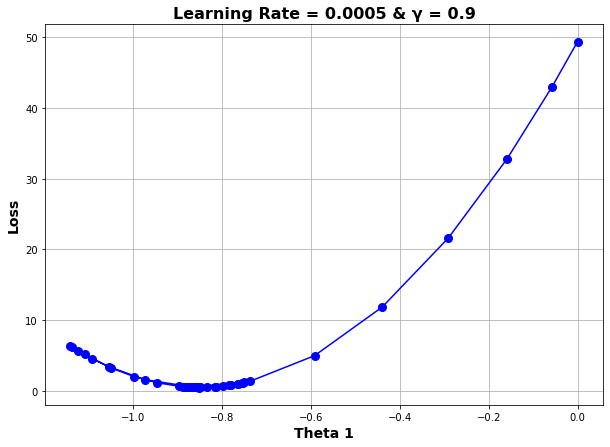

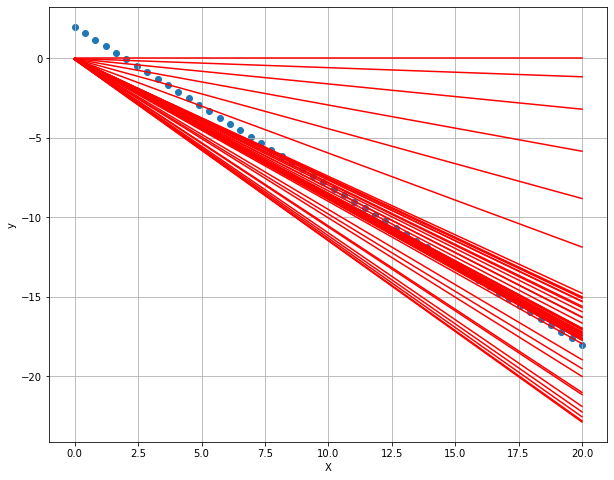

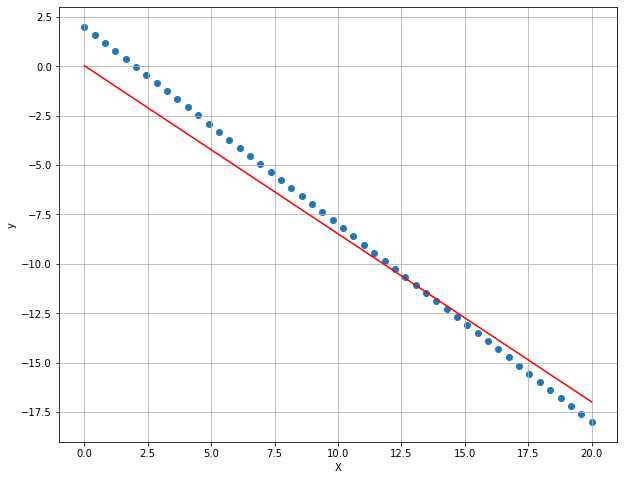

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [185]:
cost, Th_0, Th_1 , i , y_predc = NAG_GD (X, y , 0.89 , 0.0005, 300)

---------------iteration----------- 0

 h(x)  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Erorr =  [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
loss:  49.34693877551021
Gredent_vector : 
 [[  8.        ]
 [114.69387755]]
norm_g 114.97254258164628

theta_0_new: -0.004
theta_1_new: -0.05734693877551021
---------------iteratio

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [186]:
r2_score(y,y_predc[-1])

0.9699718983158406

r2 score =  0.9699718983158406


Text(0, 0.5, 'loss')

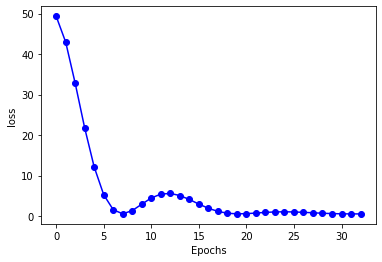

In [187]:
plt.plot(cost , "-mo" , color = "blue")
plt.xlabel("Epochs")
plt.ylabel("loss")

Text(0.5, 1.0, 'learning rat = 0.0005 & gama=0.89')

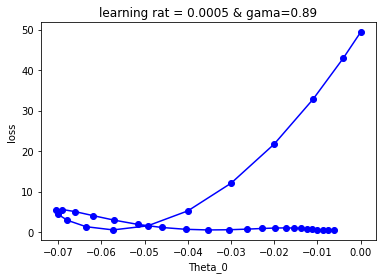

In [188]:
plt.plot(Th_0 , cost , "-mo" , color="blue")
plt.xlabel("Theta_0")
plt.ylabel("loss")
plt.title("learning rat = 0.0005 & gama=0.89")

Text(0.5, 1.0, 'learning rat = 0.0005 & gama=0.89')

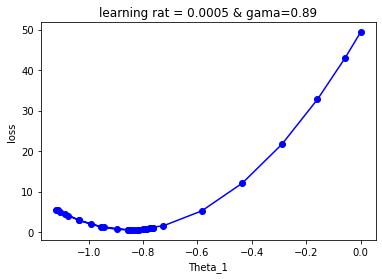

In [189]:
plt.plot(Th_1 , cost , "-mo" , color="blue")
plt.xlabel("Theta_1")
plt.ylabel("loss")
plt.title("learning rat = 0.0005 & gama=0.89")

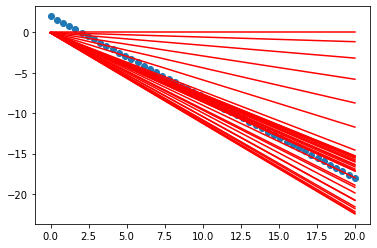

In [190]:
plt.scatter( X,y, marker="o" )
for i in y_predc:
    plt.plot( X,i ,color="red")
plt.show()

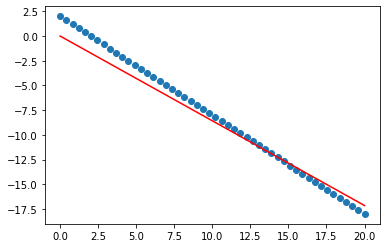

In [191]:
plt.scatter( X,y, marker="o" )
plt.plot( X,y_predc[-1] ,color="red")
plt.show()

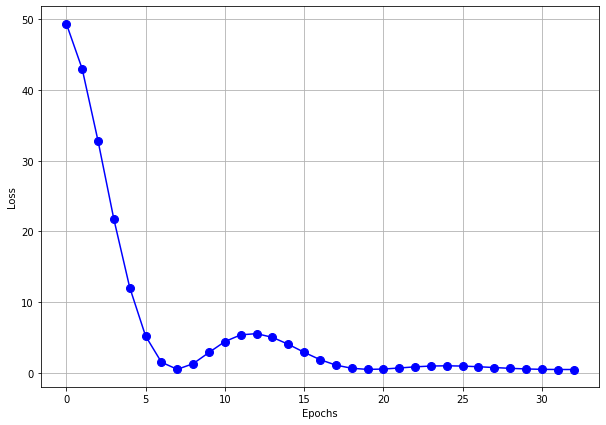

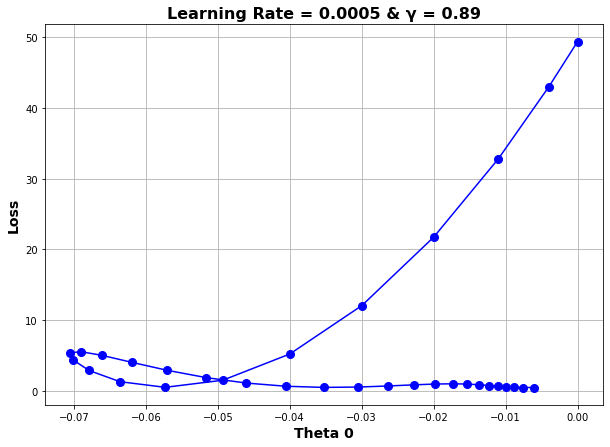

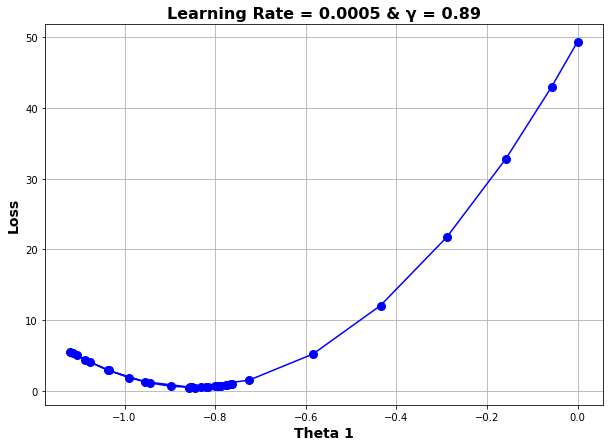

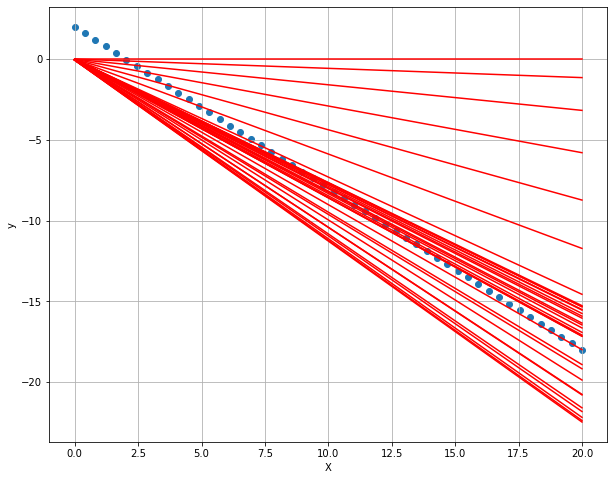

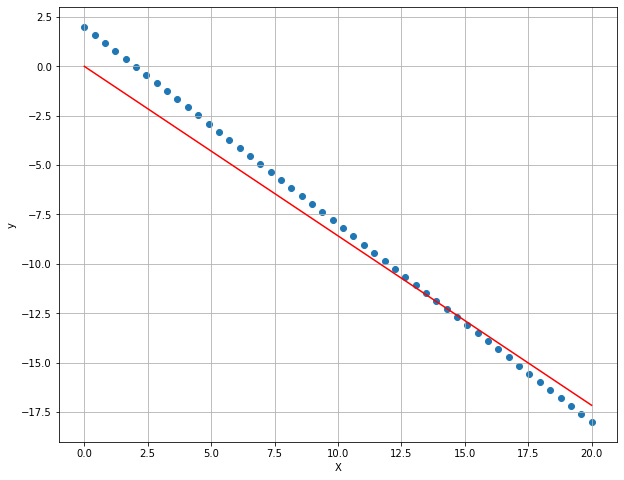